## 📊 Bakery Data Lab - Transactions Analysis Notebook

### 🧁 Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

### 📦 Connect to your bakery-manager SQLite database

In [4]:
conn = sqlite3.connect("../../bakery-manager/bakery.db")

### 🔍 Load transactions into a DataFrame

In [5]:
query = "SELECT * FROM transactions"
df = pd.read_sql_query(query, conn)
df.head()

,id,date,transaction_type,amount,description
0,1,2025-04-01,sale,125.50,Morning pastry sales
1,2,2025-04-01,expense,42.00,Purchased 50 lbs of flour
2,3,2025-04-02,sale,98.25,Coffee + croissant combo special
3,4,2025-04-02,expense,28.75,Eggs and butter from supplier
4,5,2025-04-03,sale,145.00,Custom catering order for local office


### 🧠 Explore the structure

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10 non-null     int64  
 1   date              10 non-null     object 
 2   transaction_type  10 non-null     object 
 3   amount            10 non-null     float64
 4   description       10 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes
None
             id      amount
count  10.00000   10.000000
mean    5.50000   85.234000
std     3.02765   49.158858
min     1.00000   12.990000
25%     3.25000   49.850000
50%     5.50000   82.075000
75%     7.75000  118.687500
max    10.00000  162.300000


### 📈 Total revenue vs expenses

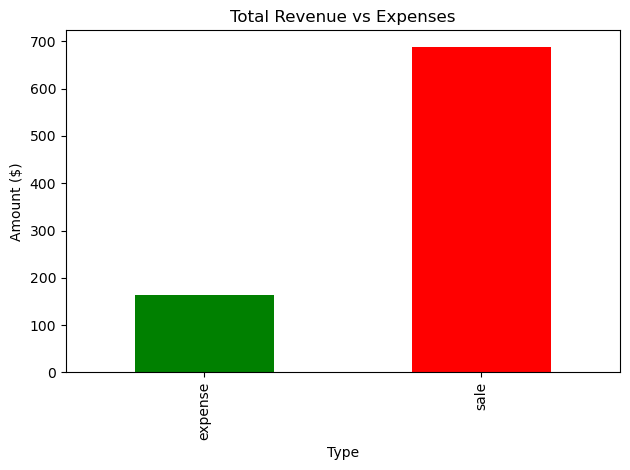

In [7]:
summary = df.groupby("transaction_type")["amount"].sum()
summary.plot(kind="bar", title="Total Revenue vs Expenses", ylabel="Amount ($)", xlabel="Type", color=["green", "red"])
plt.tight_layout()
plt.show()

### ⏱️ Convert date column to datetime

In [8]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

### 📅 Plot rolling 7-day revenue

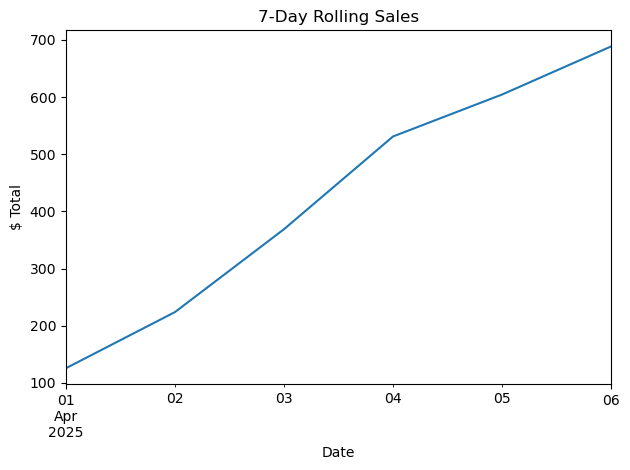

In [9]:
sales_only = df[df["transaction_type"] == "sale"]
sales_only.set_index("date", inplace=True)
rolling = sales_only["amount"].rolling("7D").sum()

rolling.plot(title="7-Day Rolling Sales")
plt.ylabel("$ Total")
plt.xlabel("Date")
plt.tight_layout()
plt.show()